## Data Pre-Processing

In [ ]:
# import the cancer patient data
import pandas as pd

cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [ ]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [ ]:
cancer_data['Geography'].describe()

count                       3051
unique                      2285
top       Miller County, Georgia
freq                           2
Name: Geography, dtype: object

In [ ]:
# Test data for predictions using model
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')

In [ ]:
# Drop binnedInc and Geography. Testing model accuracy without said variables
cancer_drop = cancer_data.drop(columns=['binnedInc','Geography'])
test_drop = test_data.drop(columns=['binnedInc','Geography'])

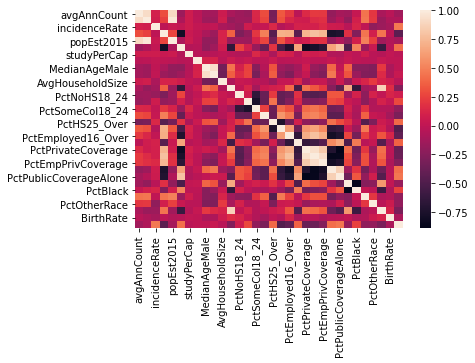

In [ ]:
# Checking correlations between variables 
import seaborn as sns

#cdata_corr_matrix = cancer_data.corr()
cdata_corr_matrix = cancer_drop.corr()
sns.heatmap(data=cdata_corr_matrix, annot=False)

In [ ]:
# Correlation coefficients between target and every variable
cdata_corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.467683
PctPublicCoverageAlone     0.456804
povertyPercent             0.427118
PctPublicCoverage          0.422291
PctHS25_Over               0.403449
PctUnemployed16_Over       0.379085
PctHS18_24                 0.284328
PctBlack                   0.250954
PctNoHS18_24               0.075815
MedianAgeFemale            0.034693
MedianAge                  0.002772
MedianAgeMale             -0.002006
studyPerCap               -0.023890
AvgHouseholdSize          -0.030288
avgDeathsPerYear          -0.074008
BirthRate                 -0.088322
popEst2015                -0.111470
avgAnnCount               -0.130745
PctWhite                  -0.173265
PctOtherRace              -0.189210
PctAsian                  -0.202352
PctSomeCol18_24           -0.206337
PctEmpPrivCoverage        -0.257117
PercentMarried            -0.262946
PctBachDeg18_24           -0.292220
PctMarriedHouseholds      -0.298414
PctPrivateCoverageAlone   -0

In [ ]:
# Checking null values in the dataset
cancer_drop.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
TARGET_d

In [ ]:
# Filling the null values using either mean or median
import statistics

cancer_1 = cancer_drop[cancer_drop['PctEmployed16_Over'].isnull() == False]
cancer_2 = cancer_drop[cancer_drop['PctPrivateCoverageAlone'].isnull() == False]
cancer_3 = cancer_drop[cancer_drop['PctSomeCol18_24'].isnull() == False]

mean1 = statistics.mean(cancer_1['PctEmployed16_Over'])
mean2 = statistics.mean(cancer_2['PctPrivateCoverageAlone'])
mean3 = statistics.mean(cancer_3['PctSomeCol18_24'])

cancer_drop['PctEmployed16_Over'] = cancer_drop['PctEmployed16_Over'].fillna(mean1)
cancer_drop['PctPrivateCoverageAlone'] = cancer_drop['PctPrivateCoverageAlone'].fillna(mean2)
cancer_drop['PctSomeCol18_24'] = cancer_drop['PctSomeCol18_24'].fillna(mean3)
cancer_drop.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

## Splitting Data into Train and Test Datasets

In [ ]:
# Seperate independent and dependent variables
X = cancer_drop.drop(columns=['TARGET_deathRate'])
y = cancer_drop['TARGET_deathRate']

In [ ]:
# import sklearn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Modeling Process

### Linear Regression Model { Test Data MSE = 345.15277699289896}

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prints y-intercept
print(linear_regressor.intercept_)

# prints the coefficient
print(linear_regressor.coef_)

167.29501317737805
[-3.43671050e-03  1.88124125e-02  2.05633367e-01  2.92573609e-05
 -1.61966521e-05  2.41802614e-01  2.60007885e-04 -3.69924754e-03
 -6.34602402e-01 -1.65074350e-01  1.29686679e+00  1.63489893e+00
 -1.45659219e-01  2.16719346e-01  4.68811452e-02 -1.92397324e-01
  3.88105055e-01 -8.91836652e-01 -6.63006601e-01  1.60268089e-01
 -7.02566882e-01  6.07205122e-02  6.39160011e-01  1.86094160e-01
 -2.31530828e-01 -2.23889074e-01 -1.04586472e-01 -3.54775767e-01
 -8.88683237e-01 -1.47208436e+00 -6.13695183e-01]


In [ ]:
y_pred = linear_regressor.predict(X_test)  # make predictions

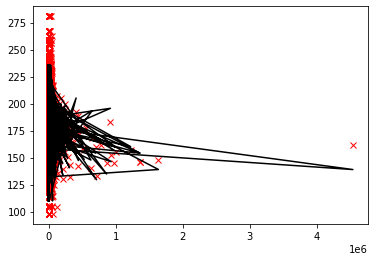

In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

# Comparing model prediction to y_test
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [ ]:
# import metrics library
from sklearn import metrics

#print result of MSE for Test Dataset
print(metrics.mean_squared_error(y_test, y_pred))

#print result of MSE for Train Dataset
print(metrics.mean_squared_error(y_train, linear_regressor.predict(X_train)))

#print result of RMSE 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

345.1527769928989
357.0172099845974
18.57828778420926


### Linear Regression Model Using High Correlation Variables {Test Data MSE = 361.48539478919383}

In [ ]:
# Correlation coefficients between target and every variable
cdata_corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate           1.000000
incidenceRate              0.467683
PctPublicCoverageAlone     0.456804
povertyPercent             0.427118
PctPublicCoverage          0.422291
PctHS25_Over               0.403449
PctUnemployed16_Over       0.379085
PctHS18_24                 0.284328
PctBlack                   0.250954
PctNoHS18_24               0.075815
MedianAgeFemale            0.034693
MedianAge                  0.002772
MedianAgeMale             -0.002006
studyPerCap               -0.023890
AvgHouseholdSize          -0.030288
avgDeathsPerYear          -0.074008
BirthRate                 -0.088322
popEst2015                -0.111470
avgAnnCount               -0.130745
PctWhite                  -0.173265
PctOtherRace              -0.189210
PctAsian                  -0.202352
PctSomeCol18_24           -0.206337
PctEmpPrivCoverage        -0.257117
PercentMarried            -0.262946
PctBachDeg18_24           -0.292220
PctMarriedHouseholds      -0.298414
PctPrivateCoverageAlone   -0

In [ ]:
# Modeling using variables each with highest positive and negative correlation
X_highest = ['incidenceRate','PctPublicCoverageAlone','povertyPercent','PctPublicCoverage','medIncome','PctBachDeg25_Over']
X_used = cancer_drop[X_highest]
X_used.head()

,incidenceRate,PctPublicCoverageAlone,povertyPercent,PctPublicCoverage,medIncome,PctBachDeg25_Over
0,481.5,9.9,11.1,34.7,50038,12.2
1,486.0,12.8,9.7,32.1,59399,16.0
2,475.7,21.6,18.5,49.8,39721,7.6
3,496.6,33.0,28.1,53.2,30299,7.0
4,372.0,24.7,17.4,43.0,39625,10.5


In [ ]:
# import sklearn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_used, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_2 = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_2.fit(X_train1, y_train1) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# import metrics library
from sklearn import metrics

#print result of MSE for Test Dataset
print(metrics.mean_squared_error(y_test1, linear_2.predict(X_test1)))

#print result of MSE for Train Dataset
print(metrics.mean_squared_error(y_train1, linear_2.predict(X_train1)))


361.4853947891938
403.66079813364973


### Random Forest Model

Hasil Akurasi (*Mean Squared Error*) :
* Random Forest(random_state = 2) = 205.55408628641555
* Random Forest(random_state = 1, max_depth = 5) = 341.7124743908756
* Random Forest(random_state = 1, max_depth = 10) = 233.603630126049
* Random Forest(random_state = 2, max_depth = 10) = 231.2713010680097

In [ ]:
# Import Packages
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(random_state=2) 
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#print result of MSE
print(metrics.mean_squared_error(y_test, forest.predict(X_test)))

205.55408628641555


### Random Forest with RandomizedSearchCV or GridSearchCV

GridSearchCV :

parameters = {
    'max_depth': [10, 20, 50],
    'bootstrap': [True],
    'n_estimators': [100, 200, 400],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 6, 8],
}

* Random Forest (random_state = 1)
  * BEST PARAMS: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 400}
  * MSE Train = 62.273675950876026
  * MSE Test = 217.61683505532503
* Random Forest (random_state = 2)
  * BEST PARAMS: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 400}
  * MSE Train = 62.40810541486769
  * MSE Test = 216.82931197693463


In [ ]:
# Function for printing parameters of the best model results from Randomized Search or Grid Search
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters = {
    'max_depth': [10, 20, 50],
    'bootstrap': [True],
    'n_estimators': [100, 200, 400],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 6, 8],
}
forest_1 = RandomForestRegressor(random_state=1)
forest_2 = RandomForestRegressor(random_state=2)
cv = GridSearchCV(forest_1, parameters, cv=3, n_jobs = -1, verbose = 2)
cv.fit(X_train, y_train)

print_results(cv)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 16.9min finished


BEST PARAMS: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 400}

0.616 (+/-0.035) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.616 (+/-0.032) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 200}
0.618 (+/-0.034) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 400}
0.616 (+/-0.035) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 100}
0.616 (+/-0.032) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 200}
0.618 (+/-0.034) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 400}
0.612 (+/-0.032) for {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}

In [ ]:
from sklearn import metrics

#print result of MSE
print('MSE of Test Data : ',str(metrics.mean_squared_error(y_test, cv.predict(X_test))))
print('MSE of Train Data : ',str(metrics.mean_squared_error(y_train, cv.predict(X_train))))

MSE of Test Data :  217.61683505532503
MSE of Train Data :  62.273675950876026


### Boruta Selector and One Hot Encoding on Geography Variable

In [ ]:
import pandas as pd
cancer_OE = cancer_data
cancer_OE = pd.get_dummies(cancer_OE, columns=['Geography'])
cancer_OE.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,"Geography_Acadia Parish, Louisiana","Geography_Accomack County, Virginia","Geography_Ada County, Idaho","Geography_Adair County, Iowa","Geography_Adair County, Kentucky","Geography_Adair County, Missouri","Geography_Adair County, Oklahoma",...,"Geography_Wood County, West Virginia","Geography_Wood County, Wisconsin","Geography_Woodbury County, Iowa","Geography_Woodford County, Illinois","Geography_Woodford County, Kentucky","Geography_Woods County, Oklahoma","Geography_Woodward County, Oklahoma","Geography_Worcester County, Maryland","Geography_Worcester County, Massachusetts","Geography_Worth County, Georgia","Geography_Worth County, Iowa","Geography_Worth County, Missouri","Geography_Wright County, Minnesota","Geography_Wyandotte County, Kansas","Geography_Wyoming County, Pennsylvania","Geography_Wyoming County, West Virginia","Geography_Wythe County, Virginia","Geography_Yadkin County, North Carolina","Geography_Yakima County, Washington","Geography_Yalobusha County, Mississippi","Geography_Yamhill County, Oregon","Geography_Yancey County, North Carolina","Geography_Yankton County, South Dakota","Geography_Yates County, New York","Geography_Yavapai County, Arizona","Geography_Yazoo County, Mississippi","Geography_Yell County, Arkansas","Geography_Yellow Medicine County, Minnesota","Geography_Yellowstone County, Montana","Geography_Yoakum County, Texas","Geography_Yolo County, California","Geography_York County, Maine","Geography_York County, Nebraska","Geography_York County, Pennsylvania","Geography_York County, Virginia","Geography_Young County, Texas","Geography_Yuma County, Arizona","Geography_Yuma County, Colorado","Geography_Zapata County, Texas","Geography_Zavala County, Texas"
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [ ]:
# Filling the null values using either mean or median
import statistics

cancer_4 = cancer_OE[cancer_OE['PctEmployed16_Over'].isnull() == False]
cancer_5 = cancer_OE[cancer_OE['PctPrivateCoverageAlone'].isnull() == False]
cancer_6 = cancer_OE[cancer_OE['PctSomeCol18_24'].isnull() == False]

mean4 = statistics.mean(cancer_4['PctEmployed16_Over'])
mean5 = statistics.mean(cancer_5['PctPrivateCoverageAlone'])
mean6 = statistics.mean(cancer_6['PctSomeCol18_24'])

cancer_OE['PctEmployed16_Over'] = cancer_OE['PctEmployed16_Over'].fillna(mean4)
cancer_OE['PctPrivateCoverageAlone'] = cancer_OE['PctPrivateCoverageAlone'].fillna(mean5)
cancer_OE['PctSomeCol18_24'] = cancer_OE['PctSomeCol18_24'].fillna(mean6)

In [ ]:
# Seperate independent and dependent variables
X_OE = cancer_OE.drop(columns=['TARGET_deathRate','binnedInc'])
y_OE = cancer_OE['TARGET_deathRate']

# import sklearn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_OE, y_OE, test_size=0.2, random_state=42)

In [ ]:
# Import Packages
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_OE = RandomForestRegressor(random_state=1) 
forest_OE.fit(X_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#print result of MSE
print(metrics.mean_squared_error(y_test2, forest_OE.predict(X_test2)))

245.3315580360066


In [39]:
import numpy as np

In [43]:
rfg = RandomForestRegressor(criterion=mse, max_depth=5)
boruta_selector = BorutaPy(rfg, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
 

ValueError: ignored

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("Number of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True False  True False False False  True  True  True
 False  True False False  True  True  True  True  True False False False
  True False  True False  True  True False]
Ranking:  [ 2  1  1  1  2  1 11  9  7  1  1  1 10  1 12  7  1  1  1  1  1  8  5  3
  1  2  1  3  1  1  5]
Number of significant features:  17


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
10,AvgHouseholdSize,1
24,PctPublicCoverageAlone,1
13,PctHS18_24,1
17,PctBachDeg25_Over,1
11,PercentMarried,1
20,PctPrivateCoverage,1
9,MedianAgeFemale,1
29,PctMarriedHouseholds,1
26,PctBlack,1
28,PctOtherRace,1


In [ ]:
test_new_data = X_test.copy()
test_new_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
6,44.000000,14,506.700000,55758,6309,11.3,0.000000,43.2,42.5,43.7,0.024,61.2,25.2,28.1,40.600000,6.1,32.6,14.2,63.1,2.8,69.5,48.573314,37.3,32.5,15.8,96.772172,0.454403,0.376058,0.893137,57.241116,8.012821
2639,233.000000,69,415.500000,60658,54688,10.7,749.707431,38.8,37.6,40.0,2.380,51.0,9.2,23.4,41.247898,10.1,19.4,27.3,63.7,5.2,70.6,57.500000,42.7,25.0,12.7,88.575082,0.379828,0.716408,2.372983,49.658346,5.222637
2886,1962.667684,32,453.549422,68777,20364,7.6,0.000000,37.9,36.9,39.0,2.670,59.6,13.3,38.6,41.247898,7.0,33.5,18.1,71.4,3.5,81.8,67.300000,60.1,24.7,12.0,97.254805,0.537210,0.473139,0.359783,59.422975,6.386702
588,90.000000,39,561.900000,34494,12447,23.4,0.000000,41.5,39.8,43.0,2.390,49.5,9.7,44.8,41.247898,4.1,38.5,5.5,51.5,5.7,55.4,40.800000,36.3,45.1,25.7,59.203618,39.649463,0.169615,0.080769,46.030190,5.540488
797,415.000000,164,516.600000,56645,64180,13.1,62.324712,41.8,40.2,42.8,2.610,48.7,15.6,36.5,41.247898,9.1,38.6,14.3,55.8,10.6,69.1,54.300000,50.4,35.2,18.7,80.251843,14.024877,0.979730,2.315725,49.599540,5.981091


In [ ]:
X_test.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
6,44.000000,14,506.700000,55758,6309,11.3,0.000000,43.2,42.5,43.7,0.024,61.2,25.2,28.1,40.600000,6.1,32.6,14.2,63.1,2.8,69.5,48.573314,37.3,32.5,15.8,96.772172,0.454403,0.376058,0.893137,57.241116,8.012821
2639,233.000000,69,415.500000,60658,54688,10.7,749.707431,38.8,37.6,40.0,2.380,51.0,9.2,23.4,41.247898,10.1,19.4,27.3,63.7,5.2,70.6,57.500000,42.7,25.0,12.7,88.575082,0.379828,0.716408,2.372983,49.658346,5.222637
2886,1962.667684,32,453.549422,68777,20364,7.6,0.000000,37.9,36.9,39.0,2.670,59.6,13.3,38.6,41.247898,7.0,33.5,18.1,71.4,3.5,81.8,67.300000,60.1,24.7,12.0,97.254805,0.537210,0.473139,0.359783,59.422975,6.386702
588,90.000000,39,561.900000,34494,12447,23.4,0.000000,41.5,39.8,43.0,2.390,49.5,9.7,44.8,41.247898,4.1,38.5,5.5,51.5,5.7,55.4,40.800000,36.3,45.1,25.7,59.203618,39.649463,0.169615,0.080769,46.030190,5.540488
797,415.000000,164,516.600000,56645,64180,13.1,62.324712,41.8,40.2,42.8,2.610,48.7,15.6,36.5,41.247898,9.1,38.6,14.3,55.8,10.6,69.1,54.300000,50.4,35.2,18.7,80.251843,14.024877,0.979730,2.315725,49.599540,5.981091


In [ ]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(test_new_data))

In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestRegressor(random_state=1, n_estimators=1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [24]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#print result of MSE
print(metrics.mean_squared_error(y_test, rf_important.predict(X_important_test)))

202.36030549803672


In [27]:
# Edit test data
test_data = test_data.drop(columns=['binnedInc','Geography'])
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,28.8,27.4,30.1,3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,41.5,40.9,42.1,2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,35.0,34.2,36.0,2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,44.7,44.2,45.5,2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,535.2,44.7,44.4,2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [32]:
# Filling the null values using either mean or median
import statistics

cancer_7 = test_data[test_data['PctEmployed16_Over'].isnull() == False]
cancer_8 = test_data[test_data['PctPrivateCoverageAlone'].isnull() == False]
cancer_9 = test_data[test_data['PctSomeCol18_24'].isnull() == False]

mean7 = statistics.mean(cancer_7['PctEmployed16_Over'])
mean8 = statistics.mean(cancer_8['PctPrivateCoverageAlone'])
mean9 = statistics.mean(cancer_9['PctSomeCol18_24'])

test_data['PctEmployed16_Over'] = test_data['PctEmployed16_Over'].fillna(mean7)
test_data['PctPrivateCoverageAlone'] = test_data['PctPrivateCoverageAlone'].fillna(mean8)
test_data['PctSomeCol18_24'] = test_data['PctSomeCol18_24'].fillna(mean9)

In [33]:
X_important_predict = boruta_selector.transform(np.array(test_data))

In [46]:
pd.DataFrame(X_important_predict)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,763.0,341.000000,34368.0,33.5,30.1,3.62,51.0,29.0,23.2,11.9,52.200000,9.9,32.6,28.2,0.620104,5.804689,56.335344
1,41.0,445.200000,35615.0,21.5,42.1,2.68,52.0,36.1,47.1,7.9,46.500000,9.0,55.6,26.4,0.836770,0.029885,55.288859
2,43.0,425.700000,76672.0,7.6,36.0,2.44,55.8,26.8,30.5,17.5,71.400000,2.8,83.3,5.9,1.114294,1.844348,52.614465
3,16.0,453.549422,45856.0,11.4,45.5,2.29,60.5,13.9,35.3,15.5,63.100000,4.3,75.8,15.5,0.381749,0.163607,55.044700
4,4.0,453.549422,53739.0,10.9,44.4,2.07,55.9,31.1,29.7,15.5,67.900000,2.4,78.2,11.2,0.358423,0.000000,47.826087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,70.0,501.800000,37625.0,22.1,43.2,2.50,55.2,42.9,49.4,5.4,39.500000,9.2,60.2,25.4,0.675000,0.129167,53.063790
758,85.0,496.500000,45596.0,13.1,46.1,2.43,59.0,37.1,41.0,9.3,54.027435,7.7,68.2,20.7,0.426542,0.035278,57.149659
759,93.0,406.200000,37122.0,19.0,52.5,2.20,52.2,32.4,40.0,10.0,40.400000,12.1,61.4,23.4,0.625960,0.141727,48.108966
760,139.0,511.100000,35555.0,27.4,40.0,2.76,44.8,34.4,36.5,10.0,47.200000,12.4,54.3,23.9,32.896529,1.097490,45.683849


In [48]:
predictions = rf_important.predict(pd.DataFrame(X_important_predict))
predictions = pd.DataFrame(predictions)
predictions.head()

,0
0,138.5813
1,196.0037
2,161.7040
3,158.7412
4,148.7346


In [36]:
predictions.rename(columns={0:'prediction'}, inplace=True)
predictions.head()

,prediction
0,138.5813
1,196.0037
2,161.7040
3,158.7412
4,148.7346


In [37]:
predictions.to_csv('predictions_A3_Beg.csv',index=False)

### GridSearchCV with Boruta Selector Features

In [49]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000, 1500]}

In [50]:
rf = RandomForestRegressor(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [51]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

#print result of MSE
print(metrics.mean_squared_error(y_test, grid_search.predict(X_important_test)))

206.6220131839158


In [53]:
predictions_grid = grid_search.predict(pd.DataFrame(X_important_predict))
predictions_grid = pd.DataFrame(predictions_grid)
predictions_grid.head()

,0
0,138.325383
1,196.331789
2,162.332587
3,157.453852
4,150.147707


In [55]:
predictions_grid.rename(columns={0:'prediction'}, inplace=True)
predictions_grid.head()

,prediction
0,138.325383
1,196.331789
2,162.332587
3,157.453852
4,150.147707


In [56]:
predictions_grid.to_csv('predictions_A3_Beg(2).csv',index=False)